In [640]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
import itertools
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder #pour le recodage des variables catégorielles  
from sklearn.preprocessing import MinMaxScaler # pour effectuer la normalisations min-max
from sklearn.compose import make_column_transformer # Applique des transformateurs aux colonnes d'un tableau
from sklearn.pipeline import make_pipeline
import shap


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [641]:
df=pd.read_csv("..\preparationdedonnee\X.csv")
df

,DETT,DNAIS,AGEINC,SURFC,MUT01,MYBPC3,MYH7,TNNT2,TNNI3,GRADIENTMAXREPOSINTRAVG,...,"RECOESC(4%)_0,non",RECOESC(4%)_0.non,RECOESC(4%)_1.oui,RECOESC6%_0.non,RECOESC6%_1.oui,RECOAHA_0.non,RECOAHA_1.oui,RECOAHAétendue_0.non,RECOAHAétendue_1.oui,CJP
0,22860000,18512640,0.393737,0.018393,1,0,0,0,0,-0.586110,...,0,1,0,1,0,1,0,1,0,0
1,23726880,27348480,-0.573401,-1.321096,0,0,0,0,0,-0.586110,...,0,1,0,1,0,1,0,1,0,0
2,22597920,17396640,0.458213,0.018393,1,0,0,0,0,-0.255045,...,0,1,0,1,0,1,0,1,0,0
3,24200640,29167200,-0.766829,-0.794868,0,0,0,0,0,-0.586110,...,0,0,1,1,0,0,1,0,1,0
4,23323680,36230400,-1.733967,0.783816,0,0,0,0,0,-0.586110,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,22183200,15276960,0.716116,-1.703808,1,0,0,1,0,-0.420577,...,0,1,0,1,0,0,1,0,1,0
427,21178080,21460320,-0.186546,0.496782,0,0,0,0,0,-0.453684,...,0,1,0,1,0,0,1,0,1,0
428,22527360,25336800,-0.508926,-0.412157,0,0,0,0,0,3.320454,...,0,1,0,1,0,1,0,0,1,0
429,20763360,31668480,-1.476064,0.640299,0,0,0,0,0,-0.486790,...,0,1,0,1,0,0,1,0,1,0


In [642]:
Y = df['CJP']
X = df.drop('CJP',axis=1)

<h2>Jeux 1 :</H2>

In [643]:
col_europe=["AGEINC","GRADIENTMAXREPOSINTRAVG","EPMAXETT","DOG","TVNS","SYNC","ANTEMS"]
Xeurop=X[col_europe]
Xeurop.head(5)

,AGEINC,GRADIENTMAXREPOSINTRAVG,EPMAXETT,DOG,TVNS,SYNC,ANTEMS
0,0.393737,-0.586110,-1.438222,-0.822560,0,0,0
1,-0.573401,-0.586110,-1.438222,-0.987750,0,0,0
2,0.458213,-0.255045,-1.229770,0.333771,0,0,0
3,-0.766829,-0.586110,1.688558,-0.860681,0,1,0
4,-1.733967,-0.586110,-1.646674,-0.949629,0,0,0


In [644]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xeurop,Y,test_size=0.25)

In [645]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(128, activation='relu', input_dim=7))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [646]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True),
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2)
]

# Entraîner le modèle
history = model1.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=callbacks,validation_data=(x_test, y_test))

# Afficher la perte et l'accuracy
print("Perte (loss) finale : ", history.history['loss'][-1])
print("Accuracy finale : ", history.history['acc'][-1])

Train on 323 samples, validate on 108 samples
Epoch 1/100
 64/323 [====>.........................] - ETA: 1s - loss: 0.6932 - acc: 0.5625

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


323/323 [==============================] - 4s 13ms/sample - loss: 0.6685 - acc: 0.6997 - val_loss: 0.6178 - val_acc: 0.8241 - lr: 0.0010
Epoch 2/100
323/323 [==============================] - 0s 247us/sample - loss: 0.6112 - acc: 0.8576 - val_loss: 0.5677 - val_acc: 0.8796 - lr: 0.0010
Epoch 3/100
323/323 [==============================] - 0s 234us/sample - loss: 0.5625 - acc: 0.8793 - val_loss: 0.5268 - val_acc: 0.8796 - lr: 0.0010
Epoch 4/100
323/323 [==============================] - 0s 229us/sample - loss: 0.5246 - acc: 0.8793 - val_loss: 0.4934 - val_acc: 0.8796 - lr: 0.0010
Epoch 5/100
323/323 [==============================] - 0s 215us/sample - loss: 0.4913 - acc: 0.8793 - val_loss: 0.4671 - val_acc: 0.8796 - lr: 0.0010
Epoch 6/100
323/323 [==============================] - 0s 227us/sample - loss: 0.4660 - acc: 0.8793 - val_loss: 0.4462 - val_acc: 0.8796 - lr: 0.0010
Epoch 7/100
323/323 [==============================] - 0s 264us/sample - loss: 0.4454 - acc: 0.8793 - val_loss: 0

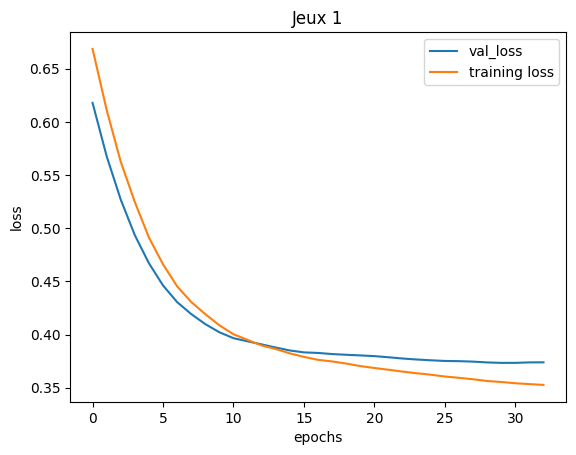

In [647]:
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel('epochs')
plt.title('Jeux 1')
plt.ylabel('loss')
plt.legend()
plt.show()

In [648]:
scores1 = model1.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f" % (model1.metrics_names[0], scores1[0]))
print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

loss: 0.37
acc: 87.96%


<h5>Shap</h5>

In [654]:
# select a set of background examples to take an expectation over
background = x_train.iloc[np.random.choice(x_train.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(
    (model1.layers[0].input, model1.layers[-1].output), background
)
shap_values = explainer.shap_values(x_test[:3].values)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [657]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0][0], feature_names=x_train.columns)

<h2>Jeux 2 :</H2>

In [577]:
col_usa=["AGEINC","GRADIENTMAXREPOSINTRAVG","EPMAXETT","DOG","TVNS","SYNC","ANTEMS","Simpsonbiplan(%)","ANVR","FIBROSEextensive_0.non",'FIBROSEextensive_1.oui']
Xusa=X[col_usa]


In [617]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(Xusa,Y,test_size=0.25)

In [633]:
model21 = tf.keras.models.Sequential()
model21.add(tf.keras.layers.Dense(128, activation='relu', input_dim=11))
model21.add(tf.keras.layers.Dropout(0.5))
model21.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model21.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [634]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True),
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2)
]

# Entraîner le modèle
history21 = model21.fit(x_train2, y_train2, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks,validation_data=(x_test2, y_test2))

# Afficher la perte et l'accuracy
print("Perte (loss) finale : ", history21.history['loss'][-1])
print("Accuracy finale : ", history21.history['acc'][-1])

Train on 323 samples, validate on 108 samples
Epoch 1/100
323/323 [==============================] - 5s 14ms/sample - loss: 0.6197 - acc: 0.6842 - val_loss: 0.5459 - val_acc: 0.8889 - lr: 0.0010
Epoch 2/100
323/323 [==============================] - 0s 323us/sample - loss: 0.5339 - acc: 0.8173 - val_loss: 0.4676 - val_acc: 0.8889 - lr: 0.0010
Epoch 3/100
323/323 [==============================] - 0s 390us/sample - loss: 0.4722 - acc: 0.8607 - val_loss: 0.4182 - val_acc: 0.8889 - lr: 0.0010
Epoch 4/100
323/323 [==============================] - 0s 332us/sample - loss: 0.4484 - acc: 0.8700 - val_loss: 0.3920 - val_acc: 0.8889 - lr: 0.0010
Epoch 5/100
323/323 [==============================] - 0s 323us/sample - loss: 0.4180 - acc: 0.8731 - val_loss: 0.3713 - val_acc: 0.8889 - lr: 0.0010
Epoch 6/100
323/323 [==============================] - 0s 311us/sample - loss: 0.3963 - acc: 0.8731 - val_loss: 0.3576 - val_acc: 0.8889 - lr: 0.0010
Epoch 7/100
323/323 [==============================] - 

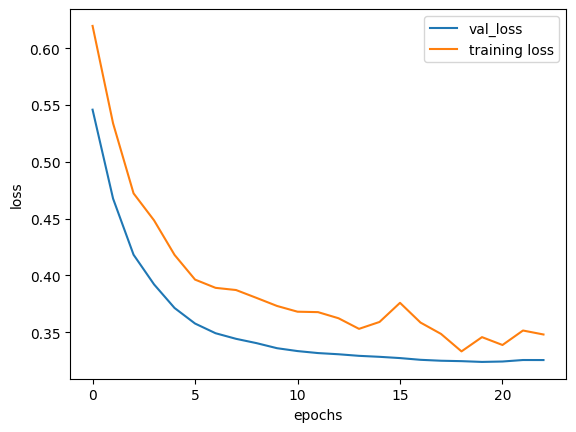

In [635]:
plt.plot(history21.history["val_loss"], label="val_loss")
plt.plot(history21.history["loss"], label="training loss")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [637]:
scores2 = model21.evaluate(x_test2, y_test2, verbose=0)
print("%s: %.2f" % (model21.metrics_names[0], scores2[0]))
print("%s: %.2f%%" % (model21.metrics_names[1], scores2[1]*100))

loss: 0.32
acc: 88.89%


<h5>shap pour jeux 2 </h5> 

In [659]:
# select a set of background examples to take an expectation over
background = x_train2.iloc[np.random.choice(x_train2.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(
    (model21.layers[0].input, model21.layers[-1].output), background
)
shap_values = explainer.shap_values(x_test2[:3].values)
shap.force_plot(
    explainer.expected_value[0], shap_values[0][0], feature_names=x_train2.columns)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


<h2>Jeux 3 :</H2> 
['CJP',
 'LASRa4C',
 'LASRs4C',
 'DATEDERNIIERENOUVELLES',
 'PALS4C',
 'DNAIS',
 'Simpsonbiplan(%)',
 'DETT',
 'suivi',
 'PACS4C',
 'LASRe4C',
 'AGEINC',
 'GLSVG',
 'SURFC',
 'TPCS4C',
 'VOG',
 'EPMAXETT',
 'TPLS4C',

In [549]:
listjeux3=["PALS2C","LASRa2C","TPCS4C","SURFC","FEVG","TPLS2C","PACS4C",'TPLS4C',"LASRe4C","LASRs2C",'AGEINC']
X_3j=X[listjeux3]

In [550]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(X_3j,Y,test_size=0.25)

In [551]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(22, activation='relu', input_dim=11))
model3.add(tf.keras.layers.Dropout(0.25))
model3.add(tf.keras.layers.Dense(8, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [552]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True),
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2)
]

# Entraîner le modèle
history3 = model3.fit(x_train3, y_train3, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks,validation_data=(x_test3, y_test3))

# Afficher la perte et l'accuracy
print("Perte (loss) finale : ", history3.history['loss'][-1])
print("Accuracy finale : ", history3.history['acc'][-1])

Train on 323 samples, validate on 108 samples
Epoch 1/100
 32/323 [=>............................] - ETA: 2s - loss: 1.0593 - acc: 0.1250

c:\Users\hacen\anaconda3\envs\TER\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323/323 [==============================] - 3s 8ms/sample - loss: 0.9838 - acc: 0.1765 - val_loss: 0.8197 - val_acc: 0.2500 - lr: 0.0010
Epoch 2/100
323/323 [==============================] - 0s 268us/sample - loss: 0.8401 - acc: 0.3003 - val_loss: 0.7136 - val_acc: 0.4352 - lr: 0.0010
Epoch 3/100
323/323 [==============================] - 0s 259us/sample - loss: 0.7491 - acc: 0.4149 - val_loss: 0.6353 - val_acc: 0.6019 - lr: 0.0010
Epoch 4/100
323/323 [==============================] - 0s 265us/sample - loss: 0.6585 - acc: 0.5882 - val_loss: 0.5809 - val_acc: 0.7685 - lr: 0.0010
Epoch 5/100
323/323 [==============================] - 0s 255us/sample - loss: 0.5997 - acc: 0.6873 - val_loss: 0.5338 - val_acc: 0.8426 - lr: 0.0010
Epoch 6/100
323/323 [==============================] - 0s 255us/sample - loss: 0.5707 - acc: 0.7368 - val_loss: 0.4951 - val_acc: 0.8981 - lr: 0.0010
Epoch 7/100
323/323 [==============================] - 0s 262us/sample - loss: 0.5346 - acc: 0.7833 - val_loss: 0.

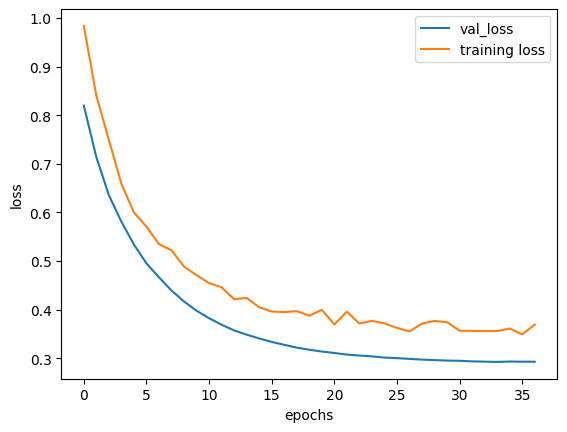

In [553]:
plt.plot(history3.history["val_loss"], label="val_loss")
plt.plot(history3.history["loss"], label="training loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [554]:
scores3 = model3.evaluate(x_test3, y_test3, verbose=0)
print("%s: %.2f" % (model3.metrics_names[0], scores3[0]))
print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

loss: 0.29
acc: 90.74%


<H5> shap pour jeux 3</h5>

In [660]:
# select a set of background examples to take an expectation over
background = x_train3.iloc[np.random.choice(x_train3.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(
    (model3.layers[0].input, model3.layers[-1].output), background
)
shap_values = explainer.shap_values(x_test3[:3].values)
shap.force_plot(
    explainer.expected_value[0], shap_values[0][0], feature_names=x_train3.columns)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


<h2>Jeux 4 :</H2> variables à considérer PACS 4C, Simpson biplan (%), Syncope et TVNS.

In [555]:
listjeux4=["PACS4C","Simpsonbiplan(%)","SYNC","TVNS"]
X_4j=X[listjeux4]

In [556]:
from sklearn.model_selection import train_test_split
x_train4,x_test4,y_train4,y_test4=train_test_split(X_4j,Y,test_size=0.25)

In [557]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Dense(128, activation='relu', input_dim=4))
#model4.add(tf.keras.layers.Dropout(0))
model4.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [558]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True),
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2)
]

# Entraîner le modèle
history4 = model4.fit(x_train4, y_train4, epochs=200, batch_size=32, validation_split=0.2, callbacks=callbacks,validation_data=(x_test4, y_test4))

# Afficher la perte et l'accuracy
print("Perte (loss) finale : ", history4.history['loss'][-1])
print("Accuracy finale : ", history4.history['acc'][-1])

Train on 323 samples, validate on 108 samples
Epoch 1/200
 32/323 [=>............................] - ETA: 2s - loss: 0.6734 - acc: 0.5000

c:\Users\hacen\anaconda3\envs\TER\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323/323 [==============================] - 3s 8ms/sample - loss: 0.6364 - acc: 0.8050 - val_loss: 0.5878 - val_acc: 0.8796 - lr: 0.0010
Epoch 2/200
323/323 [==============================] - 0s 246us/sample - loss: 0.5690 - acc: 0.8793 - val_loss: 0.5335 - val_acc: 0.8796 - lr: 0.0010
Epoch 3/200
323/323 [==============================] - 0s 231us/sample - loss: 0.5171 - acc: 0.8793 - val_loss: 0.4916 - val_acc: 0.8796 - lr: 0.0010
Epoch 4/200
323/323 [==============================] - 0s 232us/sample - loss: 0.4804 - acc: 0.8793 - val_loss: 0.4610 - val_acc: 0.8796 - lr: 0.0010
Epoch 5/200
323/323 [==============================] - 0s 234us/sample - loss: 0.4523 - acc: 0.8793 - val_loss: 0.4356 - val_acc: 0.8796 - lr: 0.0010
Epoch 6/200
323/323 [==============================] - 0s 242us/sample - loss: 0.4294 - acc: 0.8793 - val_loss: 0.4166 - val_acc: 0.8796 - lr: 0.0010
Epoch 7/200
323/323 [==============================] - 0s 232us/sample - loss: 0.4110 - acc: 0.8793 - val_loss: 0.

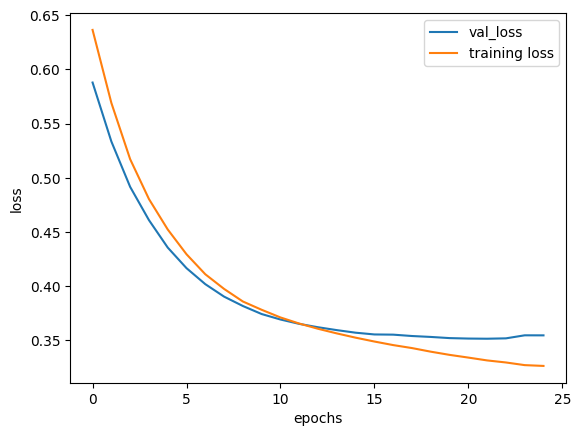

In [559]:
plt.plot(history4.history["val_loss"], label="val_loss")
plt.plot(history4.history["loss"], label="training loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [560]:
scores4 = model4.evaluate(x_test4, y_test4, verbose=0)
print("%s: %.2f%%" % (model4.metrics_names[0], scores4[0]*100))
print("%s: %.2f%%" % (model4.metrics_names[1], scores4[1]*100))

loss: 35.15%
acc: 87.04%


<h5> shap pour jeux 4</h5>

In [661]:
# select a set of background examples to take an expectation over
background = x_train4.iloc[np.random.choice(x_train4.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(
    (model4.layers[0].input, model4.layers[-1].output), background
)
shap_values = explainer.shap_values(x_test4[:3].values)
shap.force_plot(
    explainer.expected_value[0], shap_values[0][0], feature_names=x_train4.columns)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [638]:
# Afficher les résultats (ReseauN)
print("ReseauN      | J1       | J2       | J3         | J4      ")
print("accuracy     | {:.4f}   | {:.4f}   | {:.4f}     | {:.4f}  ".format(scores1[1],scores2[1],scores3[1],scores4[1]))
print("l'erreur     | {:.4f}   | {:.4f}   | {:.4f}     | {:.4f}  ".format(scores1[0],scores2[0],scores3[0],scores4[0]))


ReseauN      | J1       | J2       | J3         | J4      
accuracy     | 0.8981   | 0.8889   | 0.9074     | 0.8704  
l'erreur     | 0.3523   | 0.3238   | 0.2922     | 0.3515  
